# XGBoost Modeling
## Continuous Response (view_count)

In [17]:
# import/install librares/packages
!pip install pandas numpy scikit-learn statsmodels xgboost matplotlib seaborn
!pip install -U scikit-learn
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, root_mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


# initialize scaler
scaler = StandardScaler()

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [35]:
# read in model-ready dataset CSV
df = pd.read_csv("model_ready_dataset.csv")
print(df.columns)
df.head()

Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'view_count',
       'chart_year', 'type_Group', 'type_Person', 'country_CA', 'country_GB',
       'country_Other', 'country_US', 'key_C', 'key_C_Sharp', 'key_D',
       'key_D_Sharp', 'key_E', 'key_F', 'key_F_Sharp', 'key_G', 'key_G_Sharp',
       'key_A', 'key_A_Sharp', 'key_B', 'duration_min', 'begin_year', 'pop',
       'rock', 'hip-hop', 'r&b', 'country', 'jazz', 'electronic', 'reggae',
       'metal', 'folk', 'lyrics_pos', 'lyrics_neg', 'lyrics_neu',
       'lyrics_compound', 'title_pos', 'title_neg', 'title_neu',
       'title_compound', 'lyrics_subjectivity', 'word_count', 'avg_word_len',
       'unique_words', 'vocab_richness', 'Rap_Street_Slang_Topic',
       'Romance_Relationships_Topic', 'Life_Nostalgia_Topic',
       'Party_Dance_Sensuality_Topic', 'Love_Emotion_Sentiment_Topic',
       'Loss_Struggle_Reflection_Topic', 'Energy_Vibes_Epic_T

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,view_count,...,avg_word_len,unique_words,vocab_richness,Rap_Street_Slang_Topic,Romance_Relationships_Topic,Life_Nostalgia_Topic,Party_Dance_Sensuality_Topic,Love_Emotion_Sentiment_Topic,Loss_Struggle_Reflection_Topic,Energy_Vibes_Epic_Topic
0,0.20200,0.759,0.699,0.000131,0.4430,-5.745,0.0307,92.960,0.907,1.118930e+09,...,4.846395,98,0.307210,0.001245,0.001247,0.001247,0.362314,0.385711,0.001244,0.246992
1,0.03930,0.535,0.505,0.000000,0.0923,-8.926,0.2450,99.935,0.495,2.205607e+08,...,5.327024,428,0.450053,0.192193,0.030384,0.000396,0.015850,0.760386,0.000396,0.000396
2,0.54200,0.698,0.533,0.000000,0.3330,-6.246,0.0437,134.001,0.275,8.756409e+07,...,5.063918,141,0.290722,0.000765,0.418962,0.230767,0.000766,0.347208,0.000765,0.000766
3,0.00364,0.767,0.551,0.000000,0.0451,-7.328,0.0616,100.904,0.796,1.049947e+07,...,4.838269,132,0.300683,0.000900,0.000902,0.000901,0.000906,0.994590,0.000900,0.000901
4,0.17500,0.398,0.804,0.000000,0.1810,-5.559,0.0451,186.752,0.709,2.109060e+07,...,5.375000,117,0.365625,0.001012,0.324886,0.046997,0.624069,0.001012,0.001011,0.001014


In [36]:
# features
X = df.drop(columns=['view_count'])

feature_names = X.columns.tolist()

# numeric columns only
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
X_numeric = X[num_cols]

# scale numeric columns
X = scaler.fit_transform(X_numeric)

# target
y = df['view_count']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [4]:
# parameter grid
grid_param = {
    'n_estimators': [300, 400, 500, 600],
    'learning_rate': [0.05, 0.01, 0.02, 0.03],
    'max_depth': [7, 8, 9],
    'min_child_weight': [5, 6, 7]
}

xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=0,
    tree_method='hist'
)

In [ ]:
# set grid search
gd_sr = GridSearchCV(
    estimator=xgb,
    param_grid=grid_param,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

# fit grid search
gd_sr.fit(X_train, y_train)

In [ ]:
# best parameters / score
best_parameters = gd_sr.best_params_
print("Best Parameters:", best_parameters)

best_result = gd_sr.best_score_
print("Best CV R2 Score:", best_result)

In [37]:
# fit best model
regressor = XGBRegressor(
    objective='reg:squarederror',
    random_state=1234,
    tree_method='hist',
    n_estimators = 300,
    learning_rate = 0.01,
    max_depth = 7,
    min_child_weight = 7
)

regressor.fit(X_train, y_train)

# predict on test data and compute error metrics
y_pred = regressor.predict(X_test)

print("max error: ", max_error(y_test, y_pred))
print("mean absolute error: ", mean_absolute_error(y_test, y_pred))
print("mean squared error: ", mean_squared_error(y_test, y_pred))
print("r2 score: ", r2_score(y_test, y_pred))

max error:  6607248574.0
mean absolute error:  197891597.1410593
mean squared error:  1.6487625295467702e+17
r2 score:  0.14459614065577664


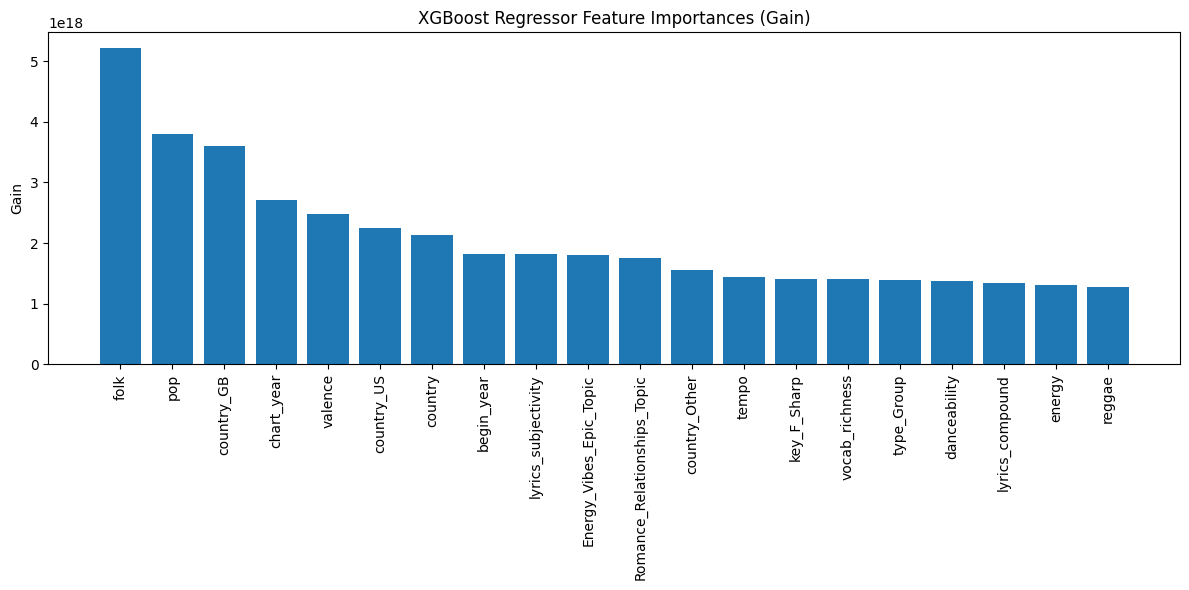

In [40]:
booster = regressor.get_booster()

# make sure real names are attached
booster.feature_names = feature_names

# get importance (keys are REAL column names)
importance_dict = booster.get_score(importance_type="gain")

# build aligned importance array
importances = np.array([
    importance_dict.get(f, 0)
    for f in feature_names
])

# sort
indices = np.argsort(importances)[::-1]

# plot
plt.figure(figsize=(12, 6))
plt.bar(range(20), importances[indices][:20])
plt.xticks(
    range(20),
    np.array(feature_names)[indices][:20],
    rotation=90
)
plt.title("XGBoost Regressor Feature Importances (Gain)")
plt.ylabel("Gain")
plt.tight_layout()
plt.show()

## Binary Response (Viral vs. Not Viral)

In [6]:
# create binary viral response variable
df['viral'] = (df['view_count'] > 100_000_000).astype(int)

In [27]:
# features
X = df.drop(columns=['viral','view_count'])

feature_names = X.columns.tolist()

# numeric columns only
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
X_numeric = X[num_cols]

# scale numeric columns
X = scaler.fit_transform(X_numeric)

# target
y = df['viral']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [8]:
# parameter grid
grid_param = {
    'n_estimators': [300, 350, 400],
    'learning_rate': [0.005, 0.01, 0.015],
    'max_depth': [7, 8],
    'min_child_weight': [6, 7]
}

xgb_clf = XGBClassifier(
    objective='binary:logistic',
    tree_method='hist',
    random_state=0,
    eval_metric='logloss'
)

In [9]:
# set grid search
gd_sr = GridSearchCV(
    estimator=xgb_clf,
    param_grid=grid_param,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# fit grid search
gd_sr.fit(X_train, y_train)

# best parameters / score
print("Best Parameters:", gd_sr.best_params_)
print("Best CV ROC AUC:", gd_sr.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'learning_rate': 0.015, 'max_depth': 8, 'min_child_weight': 7, 'n_estimators': 400}
Best CV ROC AUC: 0.7436743916565025


In [11]:
# fit best model
model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    tree_method='hist',
    random_state=1234,
    n_estimators = 400,
    learning_rate = 0.015,
    max_depth = 8,
    min_child_weight = 7
)

model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [12]:
# predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# predicted class
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7109326744904262
Precision: 0.6480446927374302
Recall: 0.40418118466898956
F1 Score: 0.4978540772532189
ROC AUC: 0.7492239467849224
Confusion Matrix:
 [[919 126]
 [342 232]]


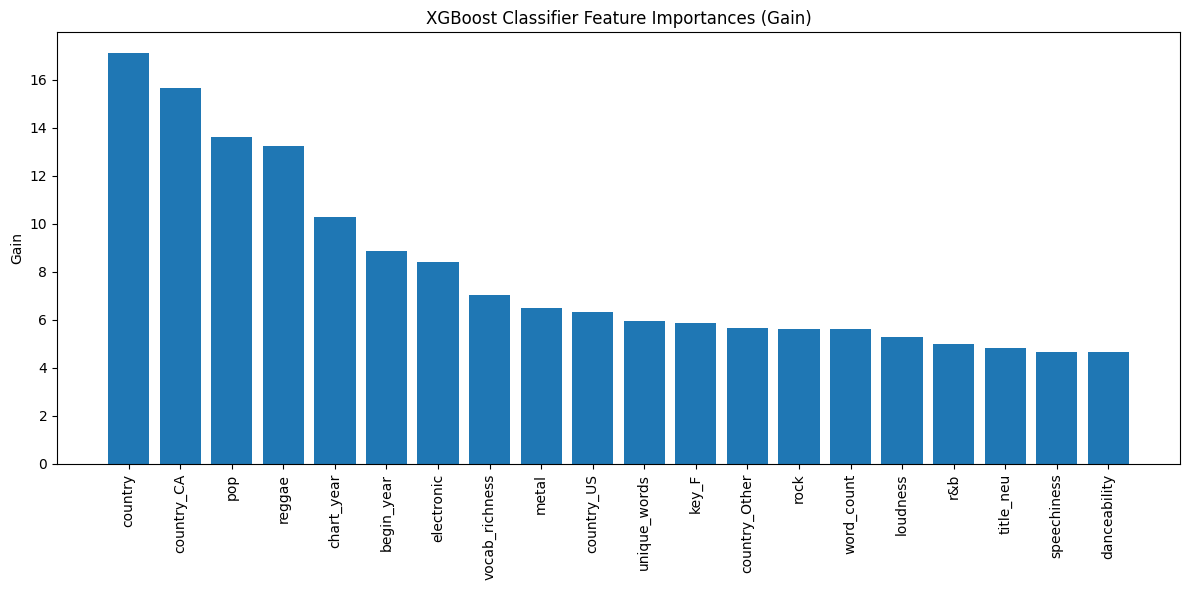

In [41]:
booster = model.get_booster()

# make sure real names are attached
booster.feature_names = feature_names

# get importance (keys are REAL column names)
importance_dict = booster.get_score(importance_type="gain")

# build aligned importance array
importances = np.array([
    importance_dict.get(f, 0)
    for f in feature_names
])

# sort
indices = np.argsort(importances)[::-1]

# plot
plt.figure(figsize=(12, 6))
plt.bar(range(20), importances[indices][:20])
plt.xticks(
    range(20),
    np.array(feature_names)[indices][:20],
    rotation=90
)
plt.title("XGBoost Classifier Feature Importances (Gain)")
plt.ylabel("Gain")
plt.tight_layout()
plt.show()